# visualize global performance 

In [6]:
import torch
import matplotlib.pyplot as plt
import collections


# Load PyTorch checkpoint file

def visualize_global(data, n_adv= 0, n_s = 10):
    # Track seller selection counts
    seller_selection_counts = collections.Counter()

    # Track final performance changes
    round_numbers = []
    final_loss = []
    final_acc = []

    # Process each round
    for round_data in data:
        round_numbers.append(round_data["round_number"])
        final_loss.append(round_data["final_perf_local"]["loss"])
        final_acc.append(round_data["final_perf_local"]["acc"])

        # Count selections per seller
        for seller in round_data["used_sellers"]:
            seller_selection_counts[seller] += 1

    # Create an ordered dictionary for seller names to maintain the sequence
    seller_names = collections.OrderedDict()
    for i in range(n_adv):
        seller_names[i] = f"adv_{i}"
    for i in range(n_adv, n_s):
        seller_names[i] = f"seller_{i}"

    # Ensure that all sellers (even those with 0 selections) are included in the order
    sorted_seller_counts = collections.OrderedDict()
    for seller_id in seller_names.keys():
        sorted_seller_counts[seller_id] = seller_selection_counts.get(seller_id, 0)

    # Map seller IDs to their corresponding names in the correct order
    mapped_sellers = list(seller_names.values())
    selection_counts = list(sorted_seller_counts.values())

    # Plot seller selection counts
    plt.figure(figsize=(10, 5))
    plt.bar(mapped_sellers, selection_counts, color="skyblue")

    plt.xlabel("Seller Name")
    plt.ylabel("Number of Selections")
    plt.title("Number of Selections per Seller")

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")  

    plt.show()

    # Plot final loss and accuracy changes over rounds
    plt.figure(figsize=(10, 5))
    plt.plot(round_numbers, final_loss, label="Loss", marker="o")
    plt.plot(round_numbers, final_acc, label="Accuracy", marker="s")
    plt.xlabel("Round Number")
    plt.ylabel("Value")
    plt.title("Change in Final Performance (Local) Over Rounds")
    plt.legend()
    plt.grid()
    plt.show()


Client splits:
  Client buyer: 5000 samples
  Client seller_0: 55000 samples


In [9]:
strength = 1.0
# bm = "single"
bm = "cmd"
# bm = "None"
n_adv = 1
file_name = f"./result/backdoor_mode_{bm}_strength_{strength}/n_seller_10_n_adv_{n_adv}_local_epoch_2_local_lr_0.01/market_log.ckpt"

data = torch.load(file_name, weights_only=False )  # Change filename as needed

visualize_global(data, n_adv=n_adv)

In [14]:
import matplotlib.pyplot as plt
import collections
import numpy as np

def visualize_comparative(data_by_adv):
    """
    Visualize and compare the experimental results for different numbers of adversaries.

    Parameters:
      data_by_adv (dict): Dictionary mapping adversary count (int) to a list of round_data.
                          Each round_data should be a dict with:
                              "round_number": int,
                              "final_perf_local": dict with keys "loss" and "acc",
                              "used_sellers": list of seller IDs.
    """
    # Define colors for each curve using a colormap.
    adv_counts = sorted(data_by_adv.keys())
    colors = plt.cm.viridis(np.linspace(0, 1, len(adv_counts)))
    
    # Create subplots for loss and accuracy over rounds.
    fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(14, 6))
    
    for i, adv in enumerate(adv_counts):
        round_numbers = []
        final_loss = []
        final_acc = []
        for rd in data_by_adv[adv]:
            round_numbers.append(rd["round_number"])
            final_loss.append(rd["final_perf_local"]["loss"])
            final_acc.append(rd["final_perf_local"]["acc"])
        
        ax_loss.plot(round_numbers, final_loss, label=f"Adv: {adv}", marker="o", color=colors[i])
        ax_acc.plot(round_numbers, final_acc, label=f"Adv: {adv}", marker="s", color=colors[i])
    
    ax_loss.set_xlabel("Round Number")
    ax_loss.set_ylabel("Loss")
    ax_loss.set_title("Loss over Rounds")
    ax_loss.legend(title="Number of Adversaries")
    ax_loss.grid(True)
    
    ax_acc.set_xlabel("Round Number")
    ax_acc.set_ylabel("Accuracy")
    ax_acc.set_title("Accuracy over Rounds")
    ax_acc.legend(title="Number of Adversaries")
    ax_acc.grid(True)
    
    plt.tight_layout()
    plt.show()

    # Additionally, visualize seller selection counts across experiments.
    plt.figure(figsize=(12, 6))
    for adv in adv_counts:
        seller_selection_counts = collections.Counter()
        for rd in data_by_adv[adv]:
            for seller in rd["used_sellers"]:
                seller_selection_counts[seller] += 1
        # Plot counts for this adversary count.
        sellers = list(seller_selection_counts.keys())
        counts = list(seller_selection_counts.values())
        plt.plot(sellers, counts, marker="o", label=f"Adv: {adv}")
    
    plt.xlabel("Seller ID")
    plt.ylabel("Number of Selections")
    plt.title("Seller Selection Counts across Different Adversary Numbers")
    plt.legend(title="Number of Adversaries")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



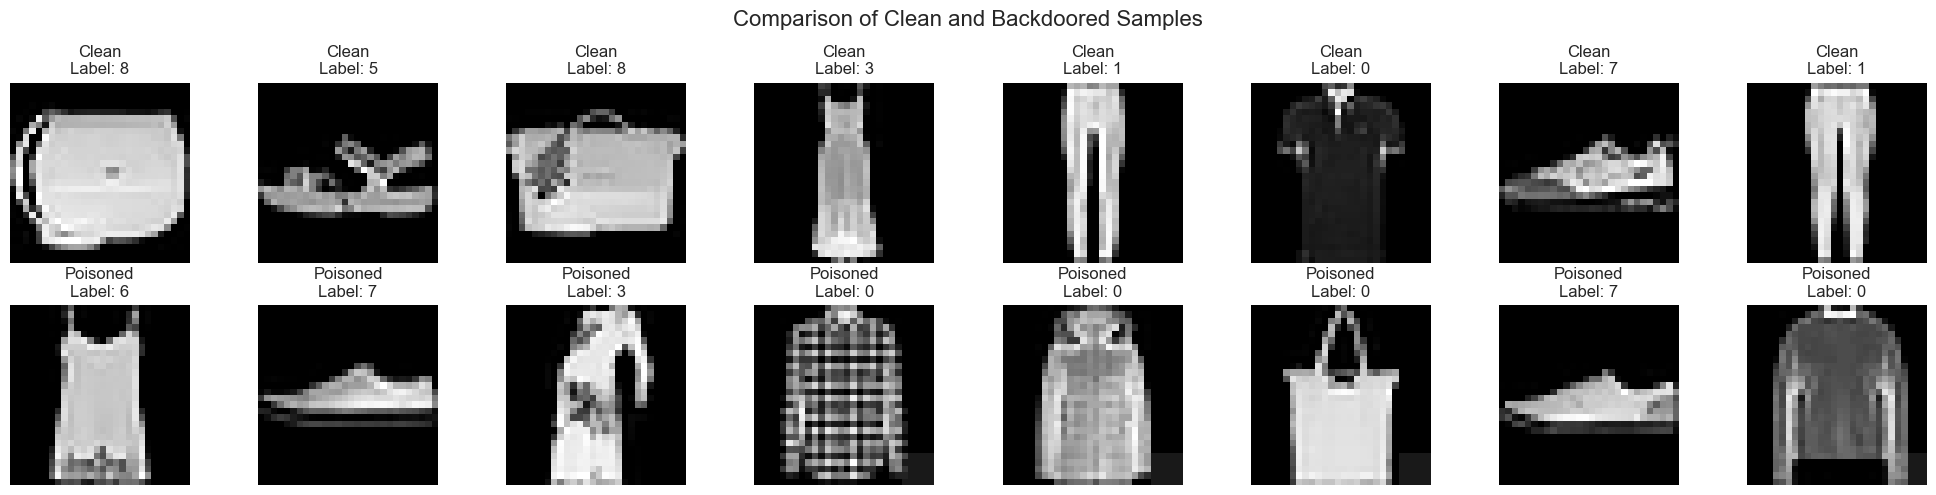


Statistics:
Number of samples shown: 8
Number of label changes: 56

Label changes:
Sample 0: 8 → 6
Sample 1: 5 → 7
Sample 2: 8 → 3
Sample 3: 3 → 0
Sample 4: 1 → 0
Sample 7: 1 → 0
Sample 8: 8 → 0
Sample 9: 2 → 0
Sample 10: 9 → 0
Sample 11: 6 → 0
Sample 12: 1 → 0
Sample 13: 7 → 8
Sample 14: 0 → 5
Sample 16: 7 → 0
Sample 17: 3 → 9
Sample 18: 7 → 5
Sample 19: 3 → 7
Sample 20: 4 → 8
Sample 21: 2 → 5
Sample 22: 2 → 0
Sample 23: 2 → 3
Sample 24: 1 → 3
Sample 25: 8 → 0
Sample 26: 5 → 4
Sample 27: 5 → 0
Sample 28: 3 → 0
Sample 30: 1 → 0
Sample 31: 1 → 3
Sample 32: 4 → 5
Sample 33: 7 → 0
Sample 34: 8 → 1
Sample 35: 6 → 0
Sample 36: 1 → 0
Sample 37: 3 → 0
Sample 38: 8 → 9
Sample 39: 4 → 0
Sample 40: 7 → 0
Sample 41: 1 → 0
Sample 42: 4 → 1
Sample 43: 5 → 0
Sample 45: 4 → 0
Sample 47: 8 → 0
Sample 48: 1 → 0
Sample 49: 6 → 0
Sample 50: 4 → 7
Sample 52: 5 → 1
Sample 53: 6 → 0
Sample 54: 7 → 9
Sample 55: 1 → 0
Sample 56: 2 → 0
Sample 57: 0 → 1
Sample 58: 2 → 0
Sample 59: 5 → 0
Sample 60: 3 → 0
Sample

In [15]:

strength = 0.1
bm = "single"
# bm = "cmd"
# bm = "None"
n_adv = 1


data_diff_adv = collections.OrderedDict()
for n_adv in range(1,6):
    file_name = f"./result/backdoor_mode_{bm}_strength_{strength}/n_seller_10_n_adv_{n_adv}_local_epoch_2_local_lr_0.01/market_log.ckpt"
    cur_data = torch.load(file_name, weights_only=False )  # Change filename as needed
    data_diff_adv[n_adv] = (cur_data)
visualize_comparative(data_diff_adv)




In [16]:
records = torch.load("./result/backdoor_mode_single_strength_0.1/n_seller_10_n_adv_1_local_epoch_2_local_lr_0.01/local_log_adv_seller_0.ckpt", weights_only=False)


SyntaxError: invalid syntax (3975885806.py, line 73)

# Visualize local

In [44]:
import torch
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Directory where your ckpt files are stored (adjust as needed)
log_dir = "./result/backdoor_mode_single_strength_0.1/n_seller_10_n_adv_1_local_epoch_2_local_lr_0.01"  # assuming they are in the current directory

# Find all files matching the pattern local_log_*.ckpt
file_pattern = os.path.join(log_dir, "local_log_*.ckpt")
files = glob.glob(file_pattern)

all_records = []

# Loop over each file and read the records
for filename in files:
    # Extract client id from filename (assuming pattern: local_log_{client_id}.ckpt)
    print(filename)
    base = os.path.basename(filename)
    client_id = int(base.split("_")[-1].split(".")[0])
    print(client_id)
    
    # Load the checkpoint file (assuming it's saved with torch.save)
    # Adjust the loading method if your ckpt files use a different format.
    records = torch.load(filename, weights_only=False)
    
    # Assume records is a list of dictionaries for each round
    # with keys: "round_number", "is_selected", etc.
    for record in records:
        record["client_id"] = client_id
        all_records.append(record)

# Convert the list of records to a pandas DataFrame
df = pd.DataFrame(all_records)

# Ensure that the is_selected field is integer (1 for True, 0 for False)
df["is_selected"] = df["is_selected"].astype(int)

# Pivot the DataFrame: rows = round_number, columns = client_id, values = is_selected
pivot_df = df.pivot(index="round_number", columns="client_id", values="is_selected")
pivot_df = pivot_df.sort_index()

# Create a heatmap of the selection status over rounds
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5, linecolor='gray')
plt.title("Selection Pattern for All Clients Over Rounds")
plt.xlabel("Client ID")
plt.ylabel("Global Round")
plt.show()


./result/backdoor_mode_single_strength_0.1/n_seller_10_n_adv_1_local_epoch_2_local_lr_0.01\local_log_adv_seller_0.ckpt
0


SyntaxError: invalid syntax (utils.py, line 223)

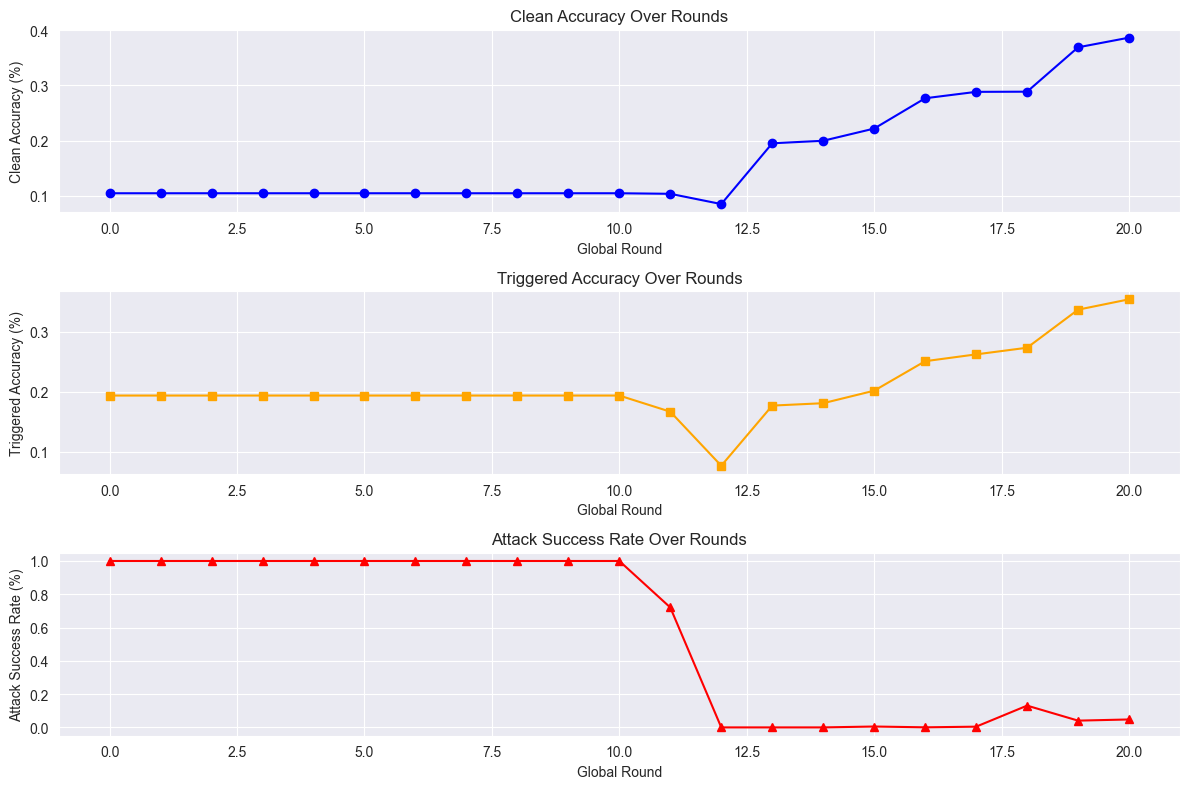

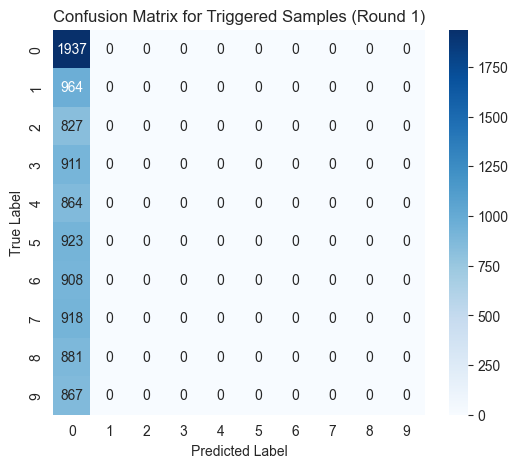

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch

# Assume round_records is your list of dictionaries, one per round.
# Each record is assumed to have a structure similar to:
# {
#    "round_number": <int>,
#    "extra_info": {
#         "poison_metrics": {
#              "clean_accuracy": float,
#              "triggered_accuracy": float,
#              "attack_success_rate": float,
#              "confusion_matrix_triggered": np.array or similar
#         },
#         ... other info ...
#    },
#    ... other keys ...
# }

def extract_metrics(round_records):
    rounds = []
    clean_acc = []
    triggered_acc = []
    asr = []
    confusion_matrices = []

    for record in round_records:
        round_num = record.get("round_number", None)
        if round_num is None:
            continue
        rounds.append(round_num)
        poison_metrics = record.get("extra_info", {}).get("poison_metrics", {})
        clean_acc.append(poison_metrics.get("clean_accuracy", np.nan))
        triggered_acc.append(poison_metrics.get("triggered_accuracy", np.nan))
        asr.append(poison_metrics.get("attack_success_rate", np.nan))
        confusion_matrices.append(poison_metrics.get("confusion_matrix_triggered", None))
    return rounds, clean_acc, triggered_acc, asr, confusion_matrices

def plot_attack_metrics(rounds, clean_acc, triggered_acc, asr):
    plt.figure(figsize=(12, 8))
    
    # Plot Clean Accuracy
    plt.subplot(3,1,1)
    plt.plot(rounds, clean_acc, marker='o', linestyle='-', color='blue')
    plt.xlabel("Global Round")
    plt.ylabel("Clean Accuracy (%)")
    plt.title("Clean Accuracy Over Rounds")
    plt.grid(True)
    
    # Plot Triggered Accuracy
    plt.subplot(3,1,2)
    plt.plot(rounds, triggered_acc, marker='s', linestyle='-', color='orange')
    plt.xlabel("Global Round")
    plt.ylabel("Triggered Accuracy (%)")
    plt.title("Triggered Accuracy Over Rounds")
    plt.grid(True)
    
    # Plot Attack Success Rate
    plt.subplot(3,1,3)
    plt.plot(rounds, asr, marker='^', linestyle='-', color='red')
    plt.xlabel("Global Round")
    plt.ylabel("Attack Success Rate (%)")
    plt.title("Attack Success Rate Over Rounds")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

def visualize_confusion_matrix(conf_matrix, round_number):
    """
    Visualize a confusion matrix (assumed to be a numpy array) for a given round.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for Triggered Samples (Round {round_number})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

round_records = []  # e.g., load from a file or variable

# For demonstration, here's a dummy record list
dummy_conf_matrix = np.array([[50, 10], [5, 35]])
round_records = torch.load(file_name, weights_only=False )  


# Extract metrics
rounds, clean_acc, triggered_acc, asr, conf_matrices = extract_metrics(round_records)

# Plot the main metrics over rounds
plot_attack_metrics(rounds, clean_acc, triggered_acc, asr)

# Optionally, visualize confusion matrix for a selected round, e.g., round 2
# You can loop over or choose a round based on some criteria.
selected_round_index = 1  # corresponds to round 2 in our dummy data
if conf_matrices[selected_round_index] is not None:
    visualize_confusion_matrix(conf_matrices[selected_round_index], rounds[selected_round_index])


In [5]:

import torch


t = torch.load("result/backdoor_mode_cmd_strength_0.1/n_seller_10_n_adv_1_local_epoch_2_local_lr_0.01/local_log_adv_seller_0.ckpt", map_location=torch.device("cpu"))

C:\Users\zeyu song\AppData\Local\Temp\ipykernel_379492\1553917950.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t = torch.load("result/backdoor_mode_cmd_strength_0.1/n

SyntaxError: invalid syntax (utils.py, line 223)

In [ ]:
import sys
print(sys.version)

In [ ]:
experiment_log = []  # will be a list of dicts

# For each combination of parameters you run:
#   is_sybil, sybil_mode, grad_mode, poison_strength, trigger_rate, n_advs, ...
# you record final metrics: final_acc, final_asr, final_mal_sel_rate, etc.

experiment_log.append({
    "is_sybil": is_sybil,
    "sybil_mode": sybil_mode,
    "grad_mode": grad_mode,
    "poison_strength": ps,
    "trigger_rate": tr,
    "n_advs": advs,
    "final_accuracy": final_acc,
    "final_backdoor_success": final_asr,
    "malicious_selection_rate": mal_rate,
    # possibly more metrics
})

# Then convert to a DataFrame for easy pivoting or plotting:
import pandas as pd
df = pd.DataFrame(experiment_log)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_sybil_attack_success_n_adv_grad_modes(df):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8), sharey=True)
    # Rows = grad_mode in ["single", "cmd"]
    # Cols = is_sybil in [False, True]
    grad_modes = ["single", "cmd"]
    is_sybil_vals = [False, True]

    for row, gm in enumerate(grad_modes):
        for col, syb in enumerate(is_sybil_vals):
            ax = axes[row, col]

            # Filter data for that grad_mode & is_sybil
            sub_df = df[(df["grad_mode"] == gm) & (df["is_sybil"] == syb)]

            # We want to plot final_backdoor_success (for instance) vs. n_advs,
            # possibly multiple lines for (trigger_rate, poison_strength)
            # We'll combine them into one "parameter combo" to differentiate by color:
            for (tr, ps), group in sub_df.groupby(["trigger_rate", "poison_strength"]):
                # group => all rows with that TR, PS
                # x => n_advs, y => final_backdoor_success
                # We can sort by n_advs so lines are drawn in order
                group_sorted = group.sort_values("n_advs")
                ax.plot(group_sorted["n_advs"], group_sorted["final_backdoor_success"],
                        marker='o', label=f"TR={tr},PS={ps}")

            ax.set_title(f"GM={gm}, Sybil={syb}")
            ax.set_xlabel("# Adversaries")
            ax.set_ylabel("Backdoor Success")
            ax.legend()
            ax.grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
def plot_bar_for_cmd_trigger_ps(df):
    # Suppose we fix grad_mode="cmd", is_sybil=True, n_advs=3
    sub_df = df[(df["grad_mode"] == "cmd") &
                (df["is_sybil"] == True) &
                (df["n_advs"] == 3)]

    # We'll make a grouped bar chart for each (trigger_rate, poison_strength).
    # x-axis => "param combo", left bar => final_accuracy, right bar => final_backdoor_success
    sub_df["param_combo"] = sub_df.apply(lambda row: f"TR={row.trigger_rate},PS={row.poison_strength}", axis=1)

    x_vals = sub_df["param_combo"]
    final_acc = sub_df["final_accuracy"]
    final_asr = sub_df["final_backdoor_success"]

    import numpy as np
    x_index = np.arange(len(sub_df))
    width = 0.3

    fig, ax = plt.subplots(figsize=(8,4))
    bar1 = ax.bar(x_index - width/2, final_acc, width, label='Final Acc')
    bar2 = ax.bar(x_index + width/2, final_asr, width, label='Backdoor SR')

    ax.set_xticks(x_index)
    ax.set_xticklabels(x_vals, rotation=45, ha='right')
    ax.legend()
    ax.set_title("Comparison at grad_mode=cmd, is_sybil=True, n_advs=3")
    ax.set_ylabel("Metric Value")

    plt.tight_layout()
    plt.show()


In [ ]:
# process the result, save into logs

In [4]:
import os
import pandas as pd
import numpy as np
import torch
from pathlib import Path
from collections import defaultdict

def process_single_experiment(file_path, attack_params):
    """
    Process a single experiment file and extract metrics.

    Args:
        file_path: Path to the market_log.ckpt file
        attack_params: Dictionary containing attack parameters

    Returns:
        processed_data: List of dictionaries with processed round data
        summary_data: Dictionary with summary metrics
    """
    # Load the experiment data
    experiment_data = torch.load(file_path, weights_only=False, map_location=torch.device('cpu'))

    # Extract round records
    round_records = experiment_data
    if not round_records:
        print(f"Warning: No round records found in {file_path}")
        return [], {}

    processed_data = []

    for i, record in enumerate(round_records):
        round_num = record.get('round_number', i)

        # Extract basic round info
        round_data = {
            'round': round_num,
            **attack_params  # Include attack parameters
        }

        # Extract performance metrics
        if 'final_perf_global' in record and record['final_perf_global'] is not None:
            round_data['main_acc'] = record['final_perf_global'].get('acc', None)
            round_data['main_loss'] = record['final_perf_global'].get('loss', None)

        # Extract backdoor attack metrics
        extra_info = record.get('extra_info', {})
        if 'poison_metrics' in extra_info:
            poison_metrics = extra_info['poison_metrics']
            round_data['clean_acc'] = poison_metrics.get('clean_accuracy', None)
            round_data['triggered_acc'] = poison_metrics.get('triggered_accuracy', None)
            round_data['asr'] = poison_metrics.get('attack_success_rate', None)

        # Extract selection rates
        if 'selection_rate_info' in record:
            selection_info = record['selection_rate_info']
            round_data['malicious_rate'] = selection_info.get('malicious_rate', None)
            round_data['benign_rate'] = selection_info.get('benign_rate', None)
            round_data['avg_malicious_rate'] = selection_info.get('avg_malicious_rate', None)
            round_data['avg_benign_rate'] = selection_info.get('avg_benign_rate', None)

        processed_data.append(round_data)

    # Calculate summary metrics
    if processed_data:
        # Sort records by round
        sorted_records = sorted(processed_data, key=lambda x: x['round'])

        # Calculate summary metrics
        summary = {
            **attack_params,

            # Calculate max ASR achieved during training
            'MAX_ASR': max([r.get('asr', 0) or 0 for r in sorted_records]),

            # Calculate final metrics (last round)
            'FINAL_ASR': sorted_records[-1].get('asr', None),
            'FINAL_MAIN_ACC': sorted_records[-1].get('main_acc', None),
            'FINAL_CLEAN_ACC': sorted_records[-1].get('clean_acc', None),
            'FINAL_TRIGGERED_ACC': sorted_records[-1].get('triggered_acc', None),

            # Calculate ASR at different stages of training
            'ASR_25PCT': next((r.get('asr', None) for r in sorted_records if r['round'] >= len(sorted_records) * 0.25), None),
            'ASR_50PCT': next((r.get('asr', None) for r in sorted_records if r['round'] >= len(sorted_records) * 0.5), None),
            'ASR_75PCT': next((r.get('asr', None) for r in sorted_records if r['round'] >= len(sorted_records) * 0.75), None),

            # Calculate rounds to reach specific ASR thresholds
            'ROUNDS_TO_50PCT_ASR': next((r['round'] for r in sorted_records if (r.get('asr', 0) or 0) >= 0.5), float('inf')),
            'ROUNDS_TO_75PCT_ASR': next((r['round'] for r in sorted_records if (r.get('asr', 0) or 0) >= 0.75), float('inf')),
            'ROUNDS_TO_90PCT_ASR': next((r['round'] for r in sorted_records if (r.get('asr', 0) or 0) >= 0.9), float('inf')),

            # Calculate average selection rates
            'AVG_MALICIOUS_RATE': np.mean([r.get('malicious_rate', 0) or 0 for r in sorted_records]),
            'AVG_BENIGN_RATE': np.mean([r.get('benign_rate', 0) or 0 for r in sorted_records]),

            # Calculate attack efficiency
            'ASR_PER_ADV': (sorted_records[-1].get('asr', 0) or 0) / attack_params['N_ADV'] if attack_params['N_ADV'] > 0 else 0,

            # Calculate stealth (1 - abs difference between clean and final accuracy)
            'STEALTH': 1 - abs((sorted_records[-1].get('main_acc', 0) or 0) - (sorted_records[-1].get('clean_acc', 0) or 0)),

            # Total rounds
            'TOTAL_ROUNDS': len(sorted_records)
        }

        # Handle infinite values for CSV export
        for key, value in summary.items():
            if value == float('inf'):
                summary[key] = -1  # Use -1 to represent "never reached threshold"

        return processed_data, summary
    else:
        return [], {}
    # 
    # except Exception as e:
    #     print(f"Error processing {file_path}: {e}")
    #     return [], {}

def get_save_path(n_sellers, n_adversaries, local_epoch, local_lr, gradient_manipulation_mode,
                  poison_strength, trigger_type, is_sybil, trigger_rate,
                  aggregation_method='martfl', dataset_name='FMNIST', sybil_mode='mimic'):
    """
    Construct a save path based on the experiment parameters.
    This is a copy of your function.
    """
    # Use is_sybil flag or, if not true, use sybil_mode
    sybil_str = str(sybil_mode) if is_sybil else False
    base_dir = Path("./results") / f"is_sybil_{sybil_str}" / "backdoor" / aggregation_method / dataset_name

    if gradient_manipulation_mode == "None":
        subfolder = "no_attack"
        param_str = f"n_seller_{n_sellers}_local_epoch_{local_epoch}_local_lr_{local_lr}"
    elif gradient_manipulation_mode == "cmd":
        subfolder = f"backdoor_mode_{gradient_manipulation_mode}_strength_{poison_strength}_trigger_type_{trigger_type}"
        param_str = f"n_seller_{n_sellers}_n_adv_{n_adversaries}_local_epoch_{local_epoch}_local_lr_{local_lr}"
    elif gradient_manipulation_mode == "single":
        subfolder = f"backdoor_mode_{gradient_manipulation_mode}_trigger_rate_{trigger_rate}_trigger_type_{trigger_type}"
        param_str = f"n_seller_{n_sellers}_n_adv_{n_adversaries}_local_epoch_{local_epoch}_local_lr_{local_lr}"
    else:
        raise NotImplementedError(f"No such attack type: {gradient_manipulation_mode}")

    # Construct the full save path
    save_path = base_dir / subfolder / param_str
    return str(save_path)

def process_all_experiments(output_dir='./processed_data', local_epoch=5):
    """
    Process all experiment files using the same parameter combinations as in your loop.
    """
    all_processed_data = []
    all_summary_data = []

    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Use the same parameter combinations as in your loop
    for grad_mode in ['cmd', 'single']:
        for trigger_rate in [0.1, 0.5, 0.7]:
            for poison_strength in [0.1, 0.5, 1.0]:
                for is_sybil in [False, True]:
                    for n_adv in [1, 3, 5]:
                        # Skip invalid combinations
                        if grad_mode == 'single' and poison_strength != 0.1:
                            continue
                        if trigger_rate == 0.7 and grad_mode == 'cmd':
                            continue

                        # Get the file path
                        save_path = get_save_path(
                            n_sellers=10,
                            n_adversaries=n_adv,
                            local_epoch=local_epoch,
                            local_lr=1e-2,
                            gradient_manipulation_mode=grad_mode,
                            poison_strength=poison_strength,
                            trigger_type="blended_patch",
                            is_sybil=is_sybil,
                            trigger_rate=trigger_rate
                        )

                        # Construct the full file path
                        file_path = f"{save_path}/market_log.ckpt"

                        if not os.path.exists(file_path):
                            print(f"File not found: {file_path}")
                            continue

                        print(f"Processing: {file_path}")

                        # Extract attack parameters
                        attack_params = {
                            'GRAD_MODE': grad_mode,
                            'TRIGGER_RATE': trigger_rate,
                            'POISON_STRENGTH': poison_strength,
                            'IS_SYBIL': is_sybil,
                            'N_ADV': n_adv
                        }

                        # Process the file
                        processed_data, summary = process_single_experiment(file_path, attack_params)

                        # Add to the overall data
                        all_processed_data.extend(processed_data)
                        if summary:
                            all_summary_data.append(summary)

    # Convert to DataFrames
    all_rounds_df = pd.DataFrame(all_processed_data)
    summary_df = pd.DataFrame(all_summary_data)

    # Save to CSV
    if not all_rounds_df.empty:
        all_rounds_csv = f"{output_dir}/all_rounds.csv"
        all_rounds_df.to_csv(all_rounds_csv, index=False)
        print(f"Saved all rounds data to {all_rounds_csv}")

    if not summary_df.empty:
        summary_csv = f"{output_dir}/summary.csv"
        summary_df.to_csv(summary_csv, index=False)
        print(f"Saved summary data to {summary_csv}")

    return all_rounds_df, summary_df

if __name__ == "__main__":
    # Process all experiments
    file_path = "./result/market_log.ckpt"
    attack_params = {
    'GRAD_MODE': "cmd",
    'TRIGGER_RATE': 0.5,
    'POISON_STRENGTH': 1.0,
    'IS_SYBIL': "mimic",
    'N_ADV': 3
    }
    
    # Process the file
    processed_data, summary = process_single_experiment(file_path, attack_params)


    # all_rounds_df, summary_df = process_all_experiments()

    # # Print summary statistics
    # if not summary_df.empty:
    #     print("\nSummary Statistics:")
    #     print(f"Total experiments processed: {len(summary_df)}")
    #     print(f"Average Final ASR: {summary_df['FINAL_ASR'].mean():.4f}")
    #     print(f"Average Main Accuracy: {summary_df['FINAL_MAIN_ACC'].mean():.4f}")
    # 
    #     # Group by attack type
    #     for grad_mode in summary_df['GRAD_MODE'].unique():
    #         grad_data = summary_df[summary_df['GRAD_MODE'] == grad_mode]
    #         print(f"\nGradient Mode: {grad_mode}")
    #         print(f"  Average ASR: {grad_data['FINAL_ASR'].mean():.4f}")
    #         print(f"  Average Main Accuracy: {grad_data['FINAL_MAIN_ACC'].mean():.4f}")
    # 
    #     # Group by Sybil mode
    #     for is_sybil in summary_df['IS_SYBIL'].unique():
    #         sybil_data = summary_df[summary_df['IS_SYBIL'] == is_sybil]
    #         print(f"\nSybil Mode: {is_sybil}")
    #         print(f"  Average ASR: {sybil_data['FINAL_ASR'].mean():.4f}")
    #         print(f"  Average Main Accuracy: {sybil_data['FINAL_MAIN_ACC'].mean():.4f}")

# visualize the csv file

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def load_processed_data(summary_csv, all_rounds_csv):
    """
    Load the processed summary and round-by-round data.
    """
    summary_df = pd.read_csv(summary_csv)
    all_rounds_df = pd.read_csv(all_rounds_csv)

    # Convert boolean columns
    if 'IS_SYBIL' in summary_df.columns:
        summary_df['IS_SYBIL'] = summary_df['IS_SYBIL'].astype(bool)
    if 'IS_SYBIL' in all_rounds_df.columns:
        all_rounds_df['IS_SYBIL'] = all_rounds_df['IS_SYBIL'].astype(bool)

    return summary_df, all_rounds_df

def create_output_dir(output_dir):
    """Create output directory if it doesn't exist"""
    os.makedirs(output_dir, exist_ok=True)

def plot_attack_success_comparison(summary_df, output_dir):
    """
    Plot comparisons of Attack Success Rate (ASR) across different parameters.
    """
    plt.figure(figsize=(20, 16))

    # 1. ASR by Gradient Manipulation Method
    plt.subplot(2, 2, 1)
    sns.barplot(x='GRAD_MODE', y='FINAL_ASR', data=summary_df, ci=None)
    plt.title('Attack Success Rate by Gradient Method', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 2. ASR by Trigger Rate
    plt.subplot(2, 2, 2)
    sns.barplot(x='TRIGGER_RATE', y='FINAL_ASR', data=summary_df, ci=None)
    plt.title('Attack Success Rate by Trigger Rate', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 3. ASR by Number of Adversaries
    plt.subplot(2, 2, 3)
    sns.barplot(x='N_ADV', y='FINAL_ASR', data=summary_df, ci=None)
    plt.title('Attack Success Rate by Number of Adversaries', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 4. ASR with and without Sybil Attack
    plt.subplot(2, 2, 4)
    sns.barplot(x='IS_SYBIL', y='FINAL_ASR', data=summary_df, ci=None)
    plt.title('Attack Success Rate with/without Sybil Attack', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlabel('Sybil Attack Enabled')

    plt.tight_layout()
    plt.savefig(f"{output_dir}/asr_comparison.png", dpi=300)
    plt.close()

def plot_parameter_interactions(summary_df, output_dir):
    """
    Plot interactions between different attack parameters.
    """
    plt.figure(figsize=(20, 16))

    # 1. ASR by Poison Strength for CMD mode
    plt.subplot(2, 2, 1)
    cmd_data = summary_df[summary_df['GRAD_MODE'] == 'cmd']
    if not cmd_data.empty:
        sns.barplot(x='POISON_STRENGTH', y='FINAL_ASR', data=cmd_data, ci=None)
        plt.title('ASR by Poison Strength (CMD Mode)', fontsize=14)
        plt.ylim(0, 1.05)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 2. ASR by Trigger Rate and Gradient Mode
    plt.subplot(2, 2, 2)
    sns.barplot(x='TRIGGER_RATE', y='FINAL_ASR', hue='GRAD_MODE', data=summary_df, ci=None)
    plt.title('ASR by Trigger Rate and Gradient Mode', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 3. ASR by Number of Adversaries and Sybil Mode
    plt.subplot(2, 2, 3)
    sns.barplot(x='N_ADV', y='FINAL_ASR', hue='IS_SYBIL', data=summary_df, ci=None)
    plt.title('ASR by Number of Adversaries and Sybil Mode', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 4. ASR by Sybil Mode and Gradient Mode
    plt.subplot(2, 2, 4)
    sns.barplot(x='IS_SYBIL', y='FINAL_ASR', hue='GRAD_MODE', data=summary_df, ci=None)
    plt.title('ASR by Sybil Mode and Gradient Mode', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlabel('Sybil Attack Enabled')

    plt.tight_layout()
    plt.savefig(f"{output_dir}/parameter_interactions.png", dpi=300)
    plt.close()

def plot_tradeoff_analysis(summary_df, output_dir):
    """
    Plot trade-off between attack success and model accuracy.
    """
    plt.figure(figsize=(20, 10))

    # 1. ASR vs Main Task Accuracy by Gradient Mode
    plt.subplot(1, 2, 1)
    sns.scatterplot(
        x='FINAL_MAIN_ACC',
        y='FINAL_ASR',
        hue='GRAD_MODE',
        size='TRIGGER_RATE',
        data=summary_df,
        sizes=(50, 200),
        alpha=0.7
    )
    plt.title('ASR vs Main Task Accuracy by Gradient Mode', fontsize=14)
    plt.xlim(0.5, 1.05)
    plt.ylim(0, 1.05)
    plt.grid(linestyle='--', alpha=0.7)

    # 2. ASR vs Main Task Accuracy by Sybil Mode
    plt.subplot(1, 2, 2)
    sns.scatterplot(
        x='FINAL_MAIN_ACC',
        y='FINAL_ASR',
        hue='IS_SYBIL',
        size='N_ADV',
        data=summary_df,
        sizes=(50, 200),
        alpha=0.7
    )
    plt.title('ASR vs Main Task Accuracy by Sybil Mode', fontsize=14)
    plt.xlim(0.5, 1.05)
    plt.ylim(0, 1.05)
    plt.grid(linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig(f"{output_dir}/tradeoff_analysis.png", dpi=300)
    plt.close()

def plot_efficiency_analysis(summary_df, output_dir):
    """
    Plot attack efficiency metrics.
    """
    plt.figure(figsize=(20, 10))

    # 1. ASR per Adversary by Number of Adversaries
    plt.subplot(1, 2, 1)
    sns.barplot(x='N_ADV', y='ASR_PER_ADV', data=summary_df, ci=None)
    plt.title('Attack Efficiency (ASR per Adversary)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 2. ASR per Adversary by Gradient Mode and Sybil Mode
    plt.subplot(1, 2, 2)
    sns.barplot(x='GRAD_MODE', y='ASR_PER_ADV', hue='IS_SYBIL', data=summary_df, ci=None)
    plt.title('Attack Efficiency by Gradient Mode and Sybil Mode', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig(f"{output_dir}/efficiency_analysis.png", dpi=300)
    plt.close()

def plot_stealth_analysis(summary_df, output_dir):
    """
    Plot stealth metrics to see how well attacks preserve model accuracy.
    """
    plt.figure(figsize=(20, 10))

    # 1. Stealth by Gradient Mode
    plt.subplot(1, 2, 1)
    sns.barplot(x='GRAD_MODE', y='STEALTH', data=summary_df, ci=None)
    plt.title('Attack Stealth by Gradient Mode', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 2. Stealth by Trigger Rate and Number of Adversaries
    plt.subplot(1, 2, 2)
    # Create a new column for trigger rate and adversary combinations
    summary_df['TR_ADV'] = summary_df['TRIGGER_RATE'].astype(str) + '_' + summary_df['N_ADV'].astype(str)
    sns.barplot(x='TR_ADV', y='STEALTH', data=summary_df, ci=None)
    plt.title('Attack Stealth by Trigger Rate and N_ADV', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.savefig(f"{output_dir}/stealth_analysis.png", dpi=300)
    plt.close()

def plot_attack_progression(all_rounds_df, output_dir):
    """
    Plot progression of attack success and model accuracy over rounds.
    """
    # Group data by attack configuration for grad mode comparison
    plt.figure(figsize=(15, 10))

    # For meaningful average trends, group by GRAD_MODE and calculate statistics
    grouped_data = all_rounds_df.groupby(['GRAD_MODE', 'round']).agg({
        'asr': ['mean', 'std'],
        'main_acc': ['mean', 'std']
    }).reset_index()

    # Flatten multi-level columns
    grouped_data.columns = ['_'.join(col).strip('_') for col in grouped_data.columns.values]

    # Plot ASR progression by gradient mode
    plt.subplot(2, 1, 1)
    for grad_mode in all_rounds_df['GRAD_MODE'].unique():
        data = grouped_data[grouped_data['GRAD_MODE'] == grad_mode]

        # Plot mean with shaded std deviation
        plt.plot(data['round'], data['asr_mean'], label=f'{grad_mode}', marker='o', markersize=4)
        plt.fill_between(
            data['round'],
            data['asr_mean'] - data['asr_std'],
            data['asr_mean'] + data['asr_std'],
            alpha=0.2
        )

    plt.title('ASR Progression by Gradient Mode', fontsize=14)
    plt.xlabel('Round')
    plt.ylabel('Attack Success Rate')
    plt.ylim(0, 1.05)
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend()

    # Plot Main Accuracy progression by gradient mode
    plt.subplot(2, 1, 2)
    for grad_mode in all_rounds_df['GRAD_MODE'].unique():
        data = grouped_data[grouped_data['GRAD_MODE'] == grad_mode]

        plt.plot(data['round'], data['main_acc_mean'], label=f'{grad_mode}', marker='o', markersize=4)
        plt.fill_between(
            data['round'],
            data['main_acc_mean'] - data['main_acc_std'],
            data['main_acc_mean'] + data['main_acc_std'],
            alpha=0.2
        )

    plt.title('Main Task Accuracy Progression by Gradient Mode', fontsize=14)
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.ylim(0.5, 1.05)
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend()

    plt.tight_layout()
    plt.savefig(f"{output_dir}/progression_by_grad_mode.png", dpi=300)
    plt.close()

    # Group data by attack configuration for Sybil mode comparison
    plt.figure(figsize=(15, 10))

    # For meaningful average trends, group by IS_SYBIL and calculate statistics
    grouped_data = all_rounds_df.groupby(['IS_SYBIL', 'round']).agg({
        'asr': ['mean', 'std'],
        'main_acc': ['mean', 'std']
    }).reset_index()

    # Flatten multi-level columns
    grouped_data.columns = ['_'.join(col).strip('_') for col in grouped_data.columns.values]

    # Plot ASR progression by Sybil mode
    plt.subplot(2, 1, 1)
    for is_sybil in all_rounds_df['IS_SYBIL'].unique():
        data = grouped_data[grouped_data['IS_SYBIL'] == is_sybil]

        # Plot mean with shaded std deviation
        plt.plot(data['round'], data['asr_mean'], label=f'Sybil={is_sybil}', marker='o', markersize=4)
        plt.fill_between(
            data['round'],
            data['asr_mean'] - data['asr_std'],
            data['asr_mean'] + data['asr_std'],
            alpha=0.2
        )

    plt.title('ASR Progression by Sybil Mode', fontsize=14)
    plt.xlabel('Round')
    plt.ylabel('Attack Success Rate')
    plt.ylim(0, 1.05)
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend()

    # Plot Main Accuracy progression by Sybil mode
    plt.subplot(2, 1, 2)
    for is_sybil in all_rounds_df['IS_SYBIL'].unique():
        data = grouped_data[grouped_data['IS_SYBIL'] == is_sybil]

        plt.plot(data['round'], data['main_acc_mean'], label=f'Sybil={is_sybil}', marker='o', markersize=4)
        plt.fill_between(
            data['round'],
            data['main_acc_mean'] - data['main_acc_std'],
            data['main_acc_mean'] + data['main_acc_std'],
            alpha=0.2
        )

    plt.title('Main Task Accuracy Progression by Sybil Mode', fontsize=14)
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.ylim(0.5, 1.05)
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend()

    plt.tight_layout()
    plt.savefig(f"{output_dir}/progression_by_sybil_mode.png", dpi=300)
    plt.close()

    # Group data by number of adversaries
    plt.figure(figsize=(15, 10))

    # For meaningful average trends, group by N_ADV and calculate statistics
    grouped_data = all_rounds_df.groupby(['N_ADV', 'round']).agg({
        'asr': ['mean', 'std'],
        'main_acc': ['mean', 'std']
    }).reset_index()

    # Flatten multi-level columns
    grouped_data.columns = ['_'.join(col).strip('_') for col in grouped_data.columns.values]

    # Plot ASR progression by number of adversaries
    plt.subplot(2, 1, 1)
    for n_adv in sorted(all_rounds_df['N_ADV'].unique()):
        data = grouped_data[grouped_data['N_ADV'] == n_adv]

        # Plot mean with shaded std deviation
        plt.plot(data['round'], data['asr_mean'], label=f'N_ADV={n_adv}', marker='o', markersize=4)
        plt.fill_between(
            data['round'],
            data['asr_mean'] - data['asr_std'],
            data['asr_mean'] + data['asr_std'],
            alpha=0.2
        )

    plt.title('ASR Progression by Number of Adversaries', fontsize=14)
    plt.xlabel('Round')
    plt.ylabel('Attack Success Rate')
    plt.ylim(0, 1.05)
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend()

    # Plot Main Accuracy progression by number of adversaries
    plt.subplot(2, 1, 2)
    for n_adv in sorted(all_rounds_df['N_ADV'].unique()):
        data = grouped_data[grouped_data['N_ADV'] == n_adv]

        plt.plot(data['round'], data['main_acc_mean'], label=f'N_ADV={n_adv}', marker='o', markersize=4)
        plt.fill_between(
            data['round'],
            data['main_acc_mean'] - data['main_acc_std'],
            data['main_acc_mean'] + data['main_acc_std'],
            alpha=0.2
        )

    plt.title('Main Task Accuracy Progression by Number of Adversaries', fontsize=14)
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.ylim(0.5, 1.05)
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend()

    plt.tight_layout()
    plt.savefig(f"{output_dir}/progression_by_n_adv.png", dpi=300)
    plt.close()

    # Add comparative convergence analysis
    plt.figure(figsize=(20, 10))

    # Group data by configuration to find rounds to reach specific ASR thresholds
    config_data = []

    for config, group in all_rounds_df.groupby(['GRAD_MODE', 'TRIGGER_RATE', 'POISON_STRENGTH', 'IS_SYBIL', 'N_ADV']):
        grad_mode, trigger_rate, poison_strength, is_sybil, n_adv = config

        # Find rounds to reach certain ASR thresholds
        rounds_to_50pct = float('inf')
        rounds_to_75pct = float('inf')
        rounds_to_90pct = float('inf')

        # Sort by round
        sorted_group = group.sort_values('round')

        for _, row in sorted_group.iterrows():
            if row.get('asr', 0) >= 0.5 and rounds_to_50pct == float('inf'):
                rounds_to_50pct = row['round']
            if row.get('asr', 0) >= 0.75 and rounds_to_75pct == float('inf'):
                rounds_to_75pct = row['round']
            if row.get('asr', 0) >= 0.9 and rounds_to_90pct == float('inf'):
                rounds_to_90pct = row['round']

        config_data.append({
            'GRAD_MODE': grad_mode,
            'TRIGGER_RATE': trigger_rate,
            'POISON_STRENGTH': poison_strength,
            'IS_SYBIL': is_sybil,
            'N_ADV': n_adv,
            'ROUNDS_TO_50PCT_ASR': rounds_to_50pct if rounds_to_50pct != float('inf') else None,
            'ROUNDS_TO_75PCT_ASR': rounds_to_75pct if rounds_to_75pct != float('inf') else None,
            'ROUNDS_TO_90PCT_ASR': rounds_to_90pct if rounds_to_90pct != float('inf') else None
        })

    config_df = pd.DataFrame(config_data)

    # Convert to long format for plotting
    plot_data = pd.melt(
        config_df,
        id_vars=['GRAD_MODE', 'TRIGGER_RATE', 'POISON_STRENGTH', 'IS_SYBIL', 'N_ADV'],
        value_vars=['ROUNDS_TO_50PCT_ASR', 'ROUNDS_TO_75PCT_ASR', 'ROUNDS_TO_90PCT_ASR'],
        var_name='ASR_THRESHOLD',
        value_name='ROUNDS'
    )

    # Replace None with NaN for plotting
    plot_data['ROUNDS'] = pd.to_numeric(plot_data['ROUNDS'], errors='coerce')

    # Clean up labels
    plot_data['ASR_THRESHOLD'] = plot_data['ASR_THRESHOLD'].map({
        'ROUNDS_TO_50PCT_ASR': '50% ASR',
        'ROUNDS_TO_75PCT_ASR': '75% ASR',
        'ROUNDS_TO_90PCT_ASR': '90% ASR'
    })

    # Plot rounds to reach thresholds by gradient mode
    plt.subplot(1, 2, 1)
    sns.barplot(x='GRAD_MODE', y='ROUNDS', hue='ASR_THRESHOLD', data=plot_data)
    plt.title('Rounds to Reach ASR Thresholds by Gradient Mode', fontsize=14)
    plt.ylabel('Rounds')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Plot rounds to reach thresholds by Sybil mode
    plt.subplot(1, 2, 2)
    sns.barplot(x='IS_SYBIL', y='ROUNDS', hue='ASR_THRESHOLD', data=plot_data)
    plt.title('Rounds to Reach ASR Thresholds by Sybil Mode', fontsize=14)
    plt.ylabel('Rounds')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlabel('Sybil Attack Enabled')

    plt.tight_layout()
    plt.savefig(f"{output_dir}/threshold_convergence_analysis.png", dpi=300)
    plt.close()

def plot_detailed_heatmaps(summary_df, output_dir):
    """
    Create heatmaps to show interactions between pairs of parameters.
    """
    # 1. ASR Heatmap: Trigger Rate vs Number of Adversaries
    plt.figure(figsize=(12, 10))
    pivot = summary_df.pivot_table(
        values='FINAL_ASR',
        index='TRIGGER_RATE',
        columns='N_ADV',
        aggfunc='mean'
    )
    sns.heatmap(pivot, annot=True, cmap='YlGnBu', vmin=0, vmax=1, fmt='.2f')
    plt.title('ASR by Trigger Rate and Number of Adversaries', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/heatmap_trigger_rate_vs_n_adv.png", dpi=300)
    plt.close()

    # 2. ASR Heatmap: Gradient Mode vs Sybil Mode
    plt.figure(figsize=(12, 10))
    pivot = summary_df.pivot_table(
        values='FINAL_ASR',
        index='GRAD_MODE',
        columns='IS_SYBIL',
        aggfunc='mean'
    )
    sns.heatmap(pivot, annot=True, cmap='YlGnBu', vmin=0, vmax=1, fmt='.2f')
    plt.title('ASR by Gradient Mode and Sybil Mode', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/heatmap_grad_mode_vs_sybil.png", dpi=300)
    plt.close()

    # 3. For CMD mode: ASR Heatmap by Poison Strength and Trigger Rate
    cmd_data = summary_df[summary_df['GRAD_MODE'] == 'cmd']
    if not cmd_data.empty:
        plt.figure(figsize=(12, 10))
        pivot = cmd_data.pivot_table(
            values='FINAL_ASR',
            index='POISON_STRENGTH',
            columns='TRIGGER_RATE',
            aggfunc='mean'
        )
        sns.heatmap(pivot, annot=True, cmap='YlGnBu', vmin=0, vmax=1, fmt='.2f')
        plt.title('ASR by Poison Strength and Trigger Rate (CMD Mode)', fontsize=14)
        plt.tight_layout()
        plt.savefig(f"{output_dir}/heatmap_poison_strength_vs_trigger_rate.png", dpi=300)
        plt.close()

    # 4. Main Accuracy Heatmap: Gradient Mode vs Sybil Mode
    plt.figure(figsize=(12, 10))
    pivot = summary_df.pivot_table(
        values='FINAL_MAIN_ACC',
        index='GRAD_MODE',
        columns='IS_SYBIL',
        aggfunc='mean'
    )
    sns.heatmap(pivot, annot=True, cmap='YlGnBu', vmin=0.7, vmax=1, fmt='.2f')
    plt.title('Main Task Accuracy by Gradient Mode and Sybil Mode', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/heatmap_accuracy_grad_mode_vs_sybil.png", dpi=300)
    plt.close()

    # 5. Stealth Heatmap: Trigger Rate vs Gradient Mode
    if 'STEALTH' in summary_df.columns:
        plt.figure(figsize=(12, 10))
        pivot = summary_df.pivot_table(
            values='STEALTH',
            index='TRIGGER_RATE',
            columns='GRAD_MODE',
            aggfunc='mean'
        )
        sns.heatmap(pivot, annot=True, cmap='YlGnBu', vmin=0.7, vmax=1, fmt='.2f')
        plt.title('Attack Stealth by Trigger Rate and Gradient Mode', fontsize=14)
        plt.tight_layout()
        plt.savefig(f"{output_dir}/heatmap_stealth_trigger_rate_vs_grad_mode.png", dpi=300)
        plt.close()

def plot_trigger_rate_impact(summary_df, all_rounds_df, output_dir):
    """
    Analyze the impact of trigger rates on different metrics.
    """
    # Skip if trigger rate column is missing or only has one value
    if 'TRIGGER_RATE' not in summary_df.columns or len(summary_df['TRIGGER_RATE'].unique()) <= 1:
        return

    plt.figure(figsize=(20, 15))

    # 1. Trigger Rate Impact on Final ASR
    plt.subplot(2, 2, 1)
    sns.boxplot(x='TRIGGER_RATE', y='FINAL_ASR', data=summary_df)
    plt.title('Trigger Rate Impact on Final ASR', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 2. Trigger Rate Impact on Main Task Accuracy
    plt.subplot(2, 2, 2)
    sns.boxplot(x='TRIGGER_RATE', y='FINAL_MAIN_ACC', data=summary_df)
    plt.title('Trigger Rate Impact on Main Task Accuracy', fontsize=14)
    plt.ylim(0.5, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 3. Trigger Rate Impact on ASR by Gradient Mode
    plt.subplot(2, 2, 3)
    sns.boxplot(x='TRIGGER_RATE', y='FINAL_ASR', hue='GRAD_MODE', data=summary_df)
    plt.title('Trigger Rate Impact on ASR by Gradient Mode', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 4. Trigger Rate Impact on Main Task Accuracy by Gradient Mode
    plt.subplot(2, 2, 4)
    sns.boxplot(x='TRIGGER_RATE', y='FINAL_MAIN_ACC', hue='GRAD_MODE', data=summary_df)
    plt.title('Trigger Rate Impact on Main Task Accuracy by Gradient Mode', fontsize=14)
    plt.ylim(0.5, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig(f"{output_dir}/trigger_rate_impact.png", dpi=300)
    plt.close()

    # Also analyze convergence speed by trigger rate
    if 'ROUNDS_TO_50PCT_ASR' in summary_df.columns:
        plt.figure(figsize=(15, 10))

        # Convert -1 (never reached) to NaN for visualization
        df_plot = summary_df.copy()
        for col in ['ROUNDS_TO_50PCT_ASR', 'ROUNDS_TO_75PCT_ASR', 'ROUNDS_TO_90PCT_ASR']:
            if col in df_plot.columns:
                df_plot[col] = df_plot[col].replace(-1, np.nan)

        sns.boxplot(x='TRIGGER_RATE', y='ROUNDS_TO_50PCT_ASR', data=df_plot)
        plt.title('Rounds to Reach 50% ASR by Trigger Rate', fontsize=14)
        plt.ylabel('Rounds')
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.savefig(f"{output_dir}/trigger_rate_convergence.png", dpi=300)
        plt.close()

def plot_poison_strength_impact(summary_df, all_rounds_df, output_dir):
    """
    Analyze the impact of poison strength on different metrics (for CMD mode).
    """
    # Filter to CMD mode only
    cmd_df = summary_df[summary_df['GRAD_MODE'] == 'cmd']

    # Skip if empty or poison strength column is missing or only has one value
    if cmd_df.empty or 'POISON_STRENGTH' not in cmd_df.columns or len(cmd_df['POISON_STRENGTH'].unique()) <= 1:
        return

    plt.figure(figsize=(20, 15))

    # 1. Poison Strength Impact on Final ASR
    plt.subplot(2, 2, 1)
    sns.boxplot(x='POISON_STRENGTH', y='FINAL_ASR', data=cmd_df)
    plt.title('Poison Strength Impact on Final ASR (CMD Mode)', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 2. Poison Strength Impact on Main Task Accuracy
    plt.subplot(2, 2, 2)
    sns.boxplot(x='POISON_STRENGTH', y='FINAL_MAIN_ACC', data=cmd_df)
    plt.title('Poison Strength Impact on Main Task Accuracy (CMD Mode)', fontsize=14)
    plt.ylim(0.5, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 3. Poison Strength Impact on ASR by Sybil Mode
    plt.subplot(2, 2, 3)
    sns.boxplot(x='POISON_STRENGTH', y='FINAL_ASR', hue='IS_SYBIL', data=cmd_df)
    plt.title('Poison Strength Impact on ASR by Sybil Mode (CMD Mode)', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 4. Poison Strength Impact on Main Task Accuracy by Sybil Mode
    plt.subplot(2, 2, 4)
    sns.boxplot(x='POISON_STRENGTH', y='FINAL_MAIN_ACC', hue='IS_SYBIL', data=cmd_df)
    plt.title('Poison Strength Impact on Main Task Accuracy by Sybil Mode (CMD Mode)', fontsize=14)
    plt.ylim(0.5, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig(f"{output_dir}/poison_strength_impact.png", dpi=300)
    plt.close()

    # Also analyze convergence speed by poison strength
    if 'ROUNDS_TO_50PCT_ASR' in cmd_df.columns:
        plt.figure(figsize=(15, 10))

        # Convert -1 (never reached) to NaN for visualization
        df_plot = cmd_df.copy()
        for col in ['ROUNDS_TO_50PCT_ASR', 'ROUNDS_TO_75PCT_ASR', 'ROUNDS_TO_90PCT_ASR']:
            if col in df_plot.columns:
                df_plot[col] = df_plot[col].replace(-1, np.nan)

        sns.boxplot(x='POISON_STRENGTH', y='ROUNDS_TO_50PCT_ASR', data=df_plot)
        plt.title('Rounds to Reach 50% ASR by Poison Strength (CMD Mode)', fontsize=14)
        plt.ylabel('Rounds')
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.savefig(f"{output_dir}/poison_strength_convergence.png", dpi=300)
        plt.close()

def plot_sybil_impact(summary_df, all_rounds_df, output_dir):
    """
    Analyze the impact of Sybil attacks on different metrics.
    """
    # Skip if Sybil column is missing or only has one value
    if 'IS_SYBIL' not in summary_df.columns or len(summary_df['IS_SYBIL'].unique()) <= 1:
        return

    plt.figure(figsize=(20, 15))

    # 1. Sybil Impact on Final ASR
    plt.subplot(2, 2, 1)
    sns.boxplot(x='IS_SYBIL', y='FINAL_ASR', data=summary_df)
    plt.title('Sybil Attack Impact on Final ASR', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlabel('Sybil Attack Enabled')

    # 2. Sybil Impact on Main Task Accuracy
    plt.subplot(2, 2, 2)
    sns.boxplot(x='IS_SYBIL', y='FINAL_MAIN_ACC', data=summary_df)
    plt.title('Sybil Attack Impact on Main Task Accuracy', fontsize=14)
    plt.ylim(0.5, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlabel('Sybil Attack Enabled')

    # 3. Sybil Impact on ASR by Number of Adversaries
    plt.subplot(2, 2, 3)
    sns.boxplot(x='N_ADV', y='FINAL_ASR', hue='IS_SYBIL', data=summary_df)
    plt.title('Sybil Attack Impact on ASR by Number of Adversaries', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 4. Sybil Impact on ASR by Gradient Mode
    plt.subplot(2, 2, 4)
    sns.boxplot(x='GRAD_MODE', y='FINAL_ASR', hue='IS_SYBIL', data=summary_df)
    plt.title('Sybil Attack Impact on ASR by Gradient Mode', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig(f"{output_dir}/sybil_impact.png", dpi=300)
    plt.close()

    # Analyze convergence speed difference with Sybil attacks
    if 'ROUNDS_TO_50PCT_ASR' in summary_df.columns:
        plt.figure(figsize=(15, 10))

        # Convert -1 (never reached) to NaN for visualization
        df_plot = summary_df.copy()
        for col in ['ROUNDS_TO_50PCT_ASR', 'ROUNDS_TO_75PCT_ASR', 'ROUNDS_TO_90PCT_ASR']:
            if col in df_plot.columns:
                df_plot[col] = df_plot[col].replace(-1, np.nan)

        plt.subplot(1, 2, 1)
        sns.boxplot(x='IS_SYBIL', y='ROUNDS_TO_50PCT_ASR', data=df_plot)
        plt.title('Rounds to Reach 50% ASR by Sybil Mode', fontsize=14)
        plt.ylabel('Rounds')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xlabel('Sybil Attack Enabled')

        plt.subplot(1, 2, 2)
        sns.boxplot(x='IS_SYBIL', y='ROUNDS_TO_75PCT_ASR', data=df_plot)
        plt.title('Rounds to Reach 75% ASR by Sybil Mode', fontsize=14)
        plt.ylabel('Rounds')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xlabel('Sybil Attack Enabled')

        plt.tight_layout()
        plt.savefig(f"{output_dir}/sybil_convergence.png", dpi=300)
        plt.close()

def plot_adversary_scaling(summary_df, all_rounds_df, output_dir):
    """
    Analyze how attack effectiveness scales with the number of adversaries.
    """
    # Skip if adversary number column is missing or only has one value
    if 'N_ADV' not in summary_df.columns or len(summary_df['N_ADV'].unique()) <= 1:
        return

    plt.figure(figsize=(20, 15))

    # 1. Number of Adversaries Impact on Final ASR
    plt.subplot(2, 2, 1)
    sns.boxplot(x='N_ADV', y='FINAL_ASR', data=summary_df)
    plt.title('Number of Adversaries Impact on Final ASR', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 2. Number of Adversaries Impact on Main Task Accuracy
    plt.subplot(2, 2, 2)
    sns.boxplot(x='N_ADV', y='FINAL_MAIN_ACC', data=summary_df)
    plt.title('Number of Adversaries Impact on Main Task Accuracy', fontsize=14)
    plt.ylim(0.5, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 3. Number of Adversaries Impact on ASR by Gradient Mode
    plt.subplot(2, 2, 3)
    sns.boxplot(x='N_ADV', y='FINAL_ASR', hue='GRAD_MODE', data=summary_df)
    plt.title('Number of Adversaries Impact on ASR by Gradient Mode', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 4. Attack Efficiency (ASR per Adversary)
    plt.subplot(2, 2, 4)
    if 'ASR_PER_ADV' not in summary_df.columns:
        summary_df['ASR_PER_ADV'] = summary_df['FINAL_ASR'] / summary_df['N_ADV']

    sns.boxplot(x='N_ADV', y='ASR_PER_ADV', data=summary_df)
    plt.title('Attack Efficiency (ASR per Adversary)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig(f"{output_dir}/adversary_scaling.png", dpi=300)
    plt.close()

    # Plot curves showing how ASR scales with number of adversaries
    plt.figure(figsize=(15, 10))

    # Group by all other parameters except N_ADV to see scaling within same configurations
    scaling_data = []

    param_groups = summary_df.groupby(['GRAD_MODE', 'TRIGGER_RATE', 'POISON_STRENGTH', 'IS_SYBIL'])

    for params, group in param_groups:
        if len(group['N_ADV'].unique()) > 1:  # Only include if we have multiple N_ADV values
            grad_mode, trigger_rate, poison_strength, is_sybil = params

            for i, row in group.sort_values('N_ADV').iterrows():
                scaling_data.append({
                    'GRAD_MODE': grad_mode,
                    'TRIGGER_RATE': trigger_rate,
                    'POISON_STRENGTH': poison_strength,
                    'IS_SYBIL': is_sybil,
                    'N_ADV': row['N_ADV'],
                    'FINAL_ASR': row['FINAL_ASR'],
                    'config_id': f"{grad_mode}_{trigger_rate}_{poison_strength}_{is_sybil}"
                })

    scaling_df = pd.DataFrame(scaling_data)

    if not scaling_df.empty:
        # Plot scaling curves for each configuration
        for config_id in scaling_df['config_id'].unique():
            config_data = scaling_df[scaling_df['config_id'] == config_id]
            if len(config_data) > 1:  # Need at least 2 points for a line
                plt.plot(
                    config_data['N_ADV'],
                    config_data['FINAL_ASR'],
                    marker='o',
                    label=config_id
                )

        plt.title('ASR Scaling with Number of Adversaries', fontsize=14)
        plt.xlabel('Number of Adversaries')
        plt.ylabel('Attack Success Rate')
        plt.ylim(0, 1.05)
        plt.grid(linestyle='--', alpha=0.7)
        plt.legend(loc='lower right')

        plt.tight_layout()
        plt.savefig(f"{output_dir}/adversary_scaling_curves.png", dpi=300)
        plt.close()

    # Plot learning dynamics with different numbers of adversaries
    if 'round' in all_rounds_df.columns and 'asr' in all_rounds_df.columns:
        plt.figure(figsize=(15, 10))

        # Group by round and number of adversaries
        grouped = all_rounds_df.groupby(['N_ADV', 'round']).agg({
            'asr': ['mean', 'std']
        }).reset_index()

        # Flatten multi-level columns
        grouped.columns = ['_'.join(col).strip('_') for col in grouped.columns.values]

        # Plot ASR over rounds for each N_ADV value
        for n_adv in sorted(all_rounds_df['N_ADV'].unique()):
            data = grouped[grouped['N_ADV'] == n_adv]

            plt.plot(
                data['round'],
                data['asr_mean'],
                marker='o',
                markersize=4,
                label=f"N_ADV={n_adv}"
            )
            plt.fill_between(
                data['round'],
                data['asr_mean'] - data['asr_std'],
                data['asr_mean'] + data['asr_std'],
                alpha=0.2
            )

        plt.title('ASR Progression by Number of Adversaries', fontsize=14)
        plt.xlabel('Round')
        plt.ylabel('Attack Success Rate')
        plt.ylim(0, 1.05)
        plt.grid(linestyle='--', alpha=0.7)
        plt.legend()

        plt.tight_layout()
        plt.savefig(f"{output_dir}/adversary_learning_dynamics.png", dpi=300)
        plt.close()

def create_summary_table(summary_df, output_dir):
    """
    Create a comprehensive summary table of all attack configurations and their performance.
    """
    if summary_df.empty:
        return

    # Select relevant columns for the summary
    cols = [
        'GRAD_MODE', 'TRIGGER_RATE', 'POISON_STRENGTH', 'IS_SYBIL', 'N_ADV',
        'FINAL_ASR', 'MAX_ASR', 'FINAL_MAIN_ACC', 'FINAL_CLEAN_ACC',
        'ROUNDS_TO_50PCT_ASR', 'ROUNDS_TO_75PCT_ASR', 'ASR_PER_ADV', 'STEALTH'
    ]

    # Use only columns that exist
    avail_cols = [col for col in cols if col in summary_df.columns]

    # Create the summary table
    summary_table = summary_df[avail_cols].copy()

    # Round numeric columns for readability
    numeric_cols = summary_table.select_dtypes(include=['float64']).columns
    summary_table[numeric_cols] = summary_table[numeric_cols].round(3)

    # Replace -1 values with "Never" for rounds to reach thresholds
    if 'ROUNDS_TO_50PCT_ASR' in summary_table.columns:
        summary_table['ROUNDS_TO_50PCT_ASR'] = summary_table['ROUNDS_TO_50PCT_ASR'].replace(-1, 'Never')
    if 'ROUNDS_TO_75PCT_ASR' in summary_table.columns:
        summary_table['ROUNDS_TO_75PCT_ASR'] = summary_table['ROUNDS_TO_75PCT_ASR'].replace(-1, 'Never')

    # Sort by ASR, then by Main Accuracy
    if 'FINAL_ASR' in summary_table.columns and 'FINAL_MAIN_ACC' in summary_table.columns:
        summary_table = summary_table.sort_values(['FINAL_ASR', 'FINAL_MAIN_ACC'], ascending=[False, False])

    # Save to CSV
    summary_table.to_csv(f"{output_dir}/attack_summary_table.csv", index=False)

    # Also create aggregate statistics by different groupings
    if 'FINAL_ASR' in summary_df.columns:
        # Group by GRAD_MODE
        grad_mode_stats = summary_df.groupby('GRAD_MODE')['FINAL_ASR', 'FINAL_MAIN_ACC'].mean().round(3)
        grad_mode_stats.to_csv(f"{output_dir}/grad_mode_summary.csv")

        # Group by IS_SYBIL
        if 'IS_SYBIL' in summary_df.columns:
            sybil_stats = summary_df.groupby('IS_SYBIL')['FINAL_ASR', 'FINAL_MAIN_ACC'].mean().round(3)
            sybil_stats.to_csv(f"{output_dir}/sybil_summary.csv")

        # Group by N_ADV
        if 'N_ADV' in summary_df.columns:
            n_adv_stats = summary_df.groupby('N_ADV')['FINAL_ASR', 'FINAL_MAIN_ACC'].mean().round(3)
            n_adv_stats.to_csv(f"{output_dir}/n_adv_summary.csv")

        # Group by TRIGGER_RATE
        if 'TRIGGER_RATE' in summary_df.columns:
            trigger_stats = summary_df.groupby('TRIGGER_RATE')['FINAL_ASR', 'FINAL_MAIN_ACC'].mean().round(3)
            trigger_stats.to_csv(f"{output_dir}/trigger_rate_summary.csv")

        # Group by POISON_STRENGTH (for CMD mode)
        cmd_df = summary_df[summary_df['GRAD_MODE'] == 'cmd']
        if not cmd_df.empty and 'POISON_STRENGTH' in cmd_df.columns:
            poison_stats = cmd_df.groupby('POISON_STRENGTH')['FINAL_ASR', 'FINAL_MAIN_ACC'].mean().round(3)
            poison_stats.to_csv(f"{output_dir}/poison_strength_summary.csv")

def run_visualization(summary_csv, all_rounds_csv, output_dir):
    """
    Run comprehensive visualization of backdoor attack results.

    Args:
        summary_csv: Path to summary CSV file
        all_rounds_csv: Path to round-by-round CSV file
        output_dir: Directory to save visualizations
    """
    # Create output directory
    create_output_dir(output_dir)

    # Load data
    summary_df, all_rounds_df = load_processed_data(summary_csv, all_rounds_csv)

    # Calculate stealth if not already present
    if 'STEALTH' not in summary_df.columns and 'FINAL_MAIN_ACC' in summary_df.columns and 'FINAL_CLEAN_ACC' in summary_df.columns:
        summary_df['STEALTH'] = 1 - abs(summary_df['FINAL_MAIN_ACC'] - summary_df['FINAL_CLEAN_ACC'])

    # Calculate ASR per adversary if not already present
    if 'ASR_PER_ADV' not in summary_df.columns and 'FINAL_ASR' in summary_df.columns and 'N_ADV' in summary_df.columns:
        summary_df['ASR_PER_ADV'] = summary_df['FINAL_ASR'] / summary_df['N_ADV']

    # Run visualizations
    print("Generating attack success comparison plots...")
    plot_attack_success_comparison(summary_df, output_dir)

    print("Generating parameter interaction plots...")
    plot_parameter_interactions(summary_df, output_dir)

    print("Generating tradeoff analysis plots...")
    plot_tradeoff_analysis(summary_df, output_dir)

    print("Generating attack progression plots...")
    plot_attack_progression(all_rounds_df, output_dir)

    print("Generating detailed heatmaps...")
    plot_detailed_heatmaps(summary_df, output_dir)

    print("Generating trigger rate impact plots...")
    plot_trigger_rate_impact(summary_df, all_rounds_df, output_dir)

    print("Generating poison strength impact plots...")
    plot_poison_strength_impact(summary_df, all_rounds_df, output_dir)

    print("Generating Sybil impact plots...")
    plot_sybil_impact(summary_df, all_rounds_df, output_dir)

    print("Generating adversary scaling plots...")
    plot_adversary_scaling(summary_df, all_rounds_df, output_dir)

    print("Creating summary tables...")
    create_summary_table(summary_df, output_dir)

    print(f"Visualization complete. Results saved to {output_dir}")

if __name__ == "__main__":
    import argparse

    parser = argparse.ArgumentParser(description="Visualize backdoor attack results")
    parser.add_argument("--summary", required=True, help="Path to summary CSV file")
    parser.add_argument("--rounds", required=True, help="Path to round-by-round CSV file")
    parser.add_argument("--output", default="./visualization_results", help="Output directory")

    args = parser.parse_args()

    run_visualization(args.summary, args.rounds, args.output)

In [ ]:
from marketplace.market_mechanism.martfl import Aggregator
from marketplace.seller.gradient_seller import GradientSeller

#!/usr/bin/env python3
"""
Federated Learning Backdoor Attack Analysis Pipeline

This script processes experimental logs from federated learning backdoor attacks,
extracts relevant metrics, and generates comprehensive visualizations.

Usage:
    python run_analysis_pipeline.py --local_epoch 5 --output_dir ./results_analysis

Author: Your Name
"""

import os
import argparse
import sys
from pathlib import Path

# Import the processing and visualization scripts
# Note: These need to be in the same directory or in the Python path
from process_logs import process_all_experiments
from visualization import run_visualization

def main():
    """Main function to run the entire analysis pipeline"""

    parser = argparse.ArgumentParser(description="Analyze federated learning backdoor attack results")
    parser.add_argument("--local_epoch", type=int, default=5, help="Local epoch setting used in experiments")
    parser.add_argument("--output_dir", default="./processed_results", help="Output directory for processed data and visualizations")
    parser.add_argument("--skip_processing", action="store_true", help="Skip data processing step (use existing CSVs)")
    parser.add_argument("--skip_visualization", action="store_true", help="Skip visualization step")
    parser.add_argument("--selection_analysis", action="store_true", help="Run additional selection pattern analysis")

    args = parser.parse_args()

    # Create output directories
    processed_data_dir = os.path.join(args.output_dir, "data")
    visualization_dir = os.path.join(args.output_dir, "visualizations")
    selection_analysis_dir = os.path.join(args.output_dir, "selection_analysis")

    os.makedirs(processed_data_dir, exist_ok=True)
    os.makedirs(visualization_dir, exist_ok=True)

    # Define paths for processed CSV files
    summary_csv = os.path.join(processed_data_dir, "summary.csv")
    all_rounds_csv = os.path.join(processed_data_dir, "all_rounds.csv")

    # Step 1: Process the experimental logs
    if not args.skip_processing:
        print("Step 1: Processing experimental logs...")
        all_rounds_df, summary_df = process_all_experiments(local_epoch=args.local_epoch)

        # Save processed data
        all_rounds_df.to_csv(all_rounds_csv, index=False)
        summary_df.to_csv(summary_csv, index=False)

        print(f"Processed data saved to {processed_data_dir}")
    else:
        print("Skipping data processing step.")
        if not (os.path.exists(summary_csv) and os.path.exists(all_rounds_csv)):
            print(f"Error: Required CSV files not found in {processed_data_dir}")
            print("Please run without --skip_processing flag first.")
            sys.exit(1)

    # Step 2: Generate visualizations
    if not args.skip_visualization:
        print("\nStep 2: Generating visualizations...")
        run_visualization(summary_csv, all_rounds_csv, visualization_dir)
        print(f"Visualizations saved to {visualization_dir}")
    else:
        print("Skipping visualization step.")

    # Step 3: Run selection pattern analysis if requested
    if args.selection_analysis:
        print("\nStep 3: Running selection pattern analysis...")
        os.makedirs(selection_analysis_dir, exist_ok=True)

        # Import the selection analysis module only if needed
        try:
            from selection_analysis import analyze_selection_patterns
            import pandas as pd

            # Load the processed data
            all_rounds_df = pd.read_csv(all_rounds_csv)

            # Convert boolean columns
            if 'IS_SYBIL' in all_rounds_df.columns:
                all_rounds_df['IS_SYBIL'] = all_rounds_df['IS_SYBIL'].astype(bool)

            # Process used_sellers and outlier_ids if they're stored as strings
            for col in ['used_sellers', 'outlier_ids']:
                if col in all_rounds_df.columns and all_rounds_df[col].dtype == 'object':
                    all_rounds_df[col] = all_rounds_df[col].apply(
                        lambda x: eval(x) if isinstance(x, str) and x != '' else []
                    )

            # Run the analysis
            analyze_selection_patterns(all_rounds_df, selection_analysis_dir)
            print(f"Selection pattern analysis saved to {selection_analysis_dir}")
        except ImportError:
            print("Error: selection_analysis.py not found in the current directory.")
            print("Please make sure it's in the same directory as this script.")

    print("\nAnalysis pipeline completed successfully!")

if __name__ == "__main__":
    main()

In [1]:
from entry.gradient_market.backdoor_attack import generate_attack_test_set
from attack.attack_gradient_market.poison_attack.attack_martfl import BackdoorImageGenerator
from marketplace.seller.gradient_seller import AdvancedBackdoorAdversarySeller
from marketplace.utils.gradient_market_utils.data_processor import get_data_set

sybil_params = {
    "is_sybil": args.is_sybil,
    "sybil_mode": args.sybil_mode,
    "alpha": 0.5,
    "amplify_factor": 2.0,
    "cost_scale": 1.5,
    "n_adversaries": args.n_adversaries
}

local_training_params = {
    "lr": args.local_lr,
    "epochs": args.local_epoch,
    "optimizer": "SGD",
    "weight_decay": 0.0005,
    "momentum": 0.9
}

local_attack_params = {
    "target_label": args.backdoor_target_label,
    "trigger_type": args.trigger_type,
    "poison_strength": args.poison_strength,
    "trigger_rate": args.trigger_rate,
    "gradient_manipulation_mode": args.gradient_manipulation_mode,
}

all_params = {
    "sybil_params": sybil_params,
    "local_training_params": local_training_params,
    "local_attack_params": local_attack_params
}
dataset_name = "FMNIST"

buyer_loader, client_loaders, full_dataset, test_loader = get_data_set(dataset_name, buyer_count=100,
                                                                       num_sellers=10,
                                                                       iid=True)
save_path = "results_test"
backdoor_target_label = 0
# config the buyer
buyer = GradientSeller(seller_id="buyer", local_data=buyer_loader.dataset, dataset_name=dataset_name,
                       save_path=save_path, local_training_params=local_training_params)

# config the marketplace
# config the seller and register to the marketplace
backdoor_generator = BackdoorImageGenerator(trigger_type="blended_patch", target_label=backdoor_target_label,
                                            channels=1)


cur_id = 1                      
# clean_loader, triggered_loader, triggered_clean_label = generate_attack_test_set(full_dataset, backdoor_generator,
#                                                                                  poison_test_sample)

current_seller = AdvancedBackdoorAdversarySeller(seller_id=cur_id,
                                                 local_data=buyer_loader.dataset,
                                                 target_label=0,save_path=save_path,
                                                 backdoor_generator=backdoor_generator,
                                                 device="cpu",
                                                 poison_strength=0.1,
                                                 trigger_rate=0.5,
                                                 dataset_name=dataset_name,
                                                 local_training_params=local_training_params,
                                                 )



ModuleNotFoundError: No module named 'kmeans1d'

In [ ]:
self.backdoor_data, self.clean_data

1. Attack Success Rate - Defense Comparison

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# Consistent colors
COLOR_PALETTE = sns.color_palette("Set2")

def plot_defense_comparison(results_df):
    plt.figure(figsize=(14, 6))
    
    # Create plot
    ax = sns.barplot(
        data=results_df, 
        x='DATA_SPLIT_MODE', 
        y='FINAL_ASR',
        hue='AGGREGATION_METHOD',
        errorbar=('ci', 95),
        palette=COLOR_PALETTE
    )
    
    # Add labels and title
    plt.xlabel('Data Distribution')
    plt.ylabel('Final Attack Success Rate')
    plt.title('Attack Success Rate: FedAvg vs MaRTFL', fontsize=14)
    plt.ylim(0, 1)
    plt.legend(title='Aggregation Method')
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3)
    
    plt.tight_layout()
    plt.savefig('defense_comparison.png', dpi=300)
    plt.show()

2. Impact of Adversary Ratio

In [ ]:
def plot_adversary_ratio_impact(results_df):
    plt.figure(figsize=(15, 8))
    
    # Create plot with multiple panels
    g = sns.FacetGrid(
        results_df, 
        col='DATA_SPLIT_MODE', 
        row='IS_SYBIL',
        height=3.5, 
        aspect=1.2,
        sharex=True,
        sharey=True
    )
    
    # Map data to plot
    g.map_dataframe(
        sns.lineplot, 
        x='ADV_RATE', 
        y='FINAL_ASR', 
        hue='AGGREGATION_METHOD',
        marker='o',
        palette=COLOR_PALETTE
    )
    
    # Customize appearance
    g.set_axis_labels('Adversary Ratio', 'Attack Success Rate')
    g.set_titles('Data: {col_name} | Sybil: {row_name}')
    g.add_legend(title='Aggregation Method')
    g.set(ylim=(0, 1))
    
    # Add horizontal gridlines
    for ax in g.axes.flat:
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig('adversary_ratio_impact.png', dpi=300)
    plt.show()

3. Sybil vs Non-Sybil Comparison

In [ ]:
def plot_sybil_comparison(results_df):
    plt.figure(figsize=(12, 6))
    
    # Create plot
    sns.barplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='FINAL_ASR',
        hue='IS_SYBIL',
        errorbar=('ci', 95),
        palette=COLOR_PALETTE
    )
    
    # Add labels and title
    plt.xlabel('Aggregation Method')
    plt.ylabel('Final Attack Success Rate')
    plt.title('Sybil vs Non-Sybil Attack Effectiveness', fontsize=14)
    plt.ylim(0, 1)
    plt.legend(title='Sybil Attack')
    
    # Split by data distribution
    facet = sns.FacetGrid(
        results_df, 
        col='DATA_SPLIT_MODE',
        height=4, 
        aspect=1.1
    )
    
    facet.map(
        sns.barplot, 
        'AGGREGATION_METHOD', 
        'FINAL_ASR', 
        'IS_SYBIL',
        errorbar=('ci', 95),
        palette=COLOR_PALETTE
    )
    
    facet.add_legend(title='Sybil Attack')
    facet.set_axis_labels('Aggregation Method', 'Attack Success Rate')
    facet.set_titles('Data: {col_name}')
    facet.set(ylim=(0, 1))
    
    plt.tight_layout()
    plt.savefig('sybil_comparison.png', dpi=300)
    plt.show()

In [ ]:
def plot_attack_efficiency(results_df):
    plt.figure(figsize=(14, 6))
    
    # Create grouped boxplot
    sns.boxplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='ASR_PER_ADV',
        hue='IS_SYBIL',
        palette=COLOR_PALETTE
    )
    
    # Add individual points
    sns.stripplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='ASR_PER_ADV',
        hue='IS_SYBIL',
        dodge=True,
        size=4,
        color='black',
        alpha=0.4
    )
    
    # Add labels and title
    plt.xlabel('Aggregation Method')
    plt.ylabel('ASR per Adversary')
    plt.title('Attack Efficiency: ASR per Adversary', fontsize=14)
    
    # Fix legend (remove duplicate)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[:2], labels[:2], title='Sybil Attack')
    
    plt.tight_layout()
    plt.savefig('attack_efficiency.png', dpi=300)
    plt.show()

5. Rounds to Reach ASR Thresholds

In [ ]:
def plot_rounds_to_threshold(results_df):
    # Replace -1 (never reached) with max rounds + some padding for visualization
    max_rounds = results_df['TOTAL_ROUNDS'].max()
    results_df_plot = results_df.copy()
    
    for col in ['ROUNDS_TO_50PCT_ASR', 'ROUNDS_TO_75PCT_ASR', 'ROUNDS_TO_90PCT_ASR']:
        results_df_plot[col] = results_df_plot[col].replace(-1, max_rounds * 1.2)
    
    # Melt the dataframe for easier plotting
    plot_df = pd.melt(
        results_df_plot, 
        id_vars=['AGGREGATION_METHOD', 'IS_SYBIL', 'DATA_SPLIT_MODE', 'ADV_RATE'],
        value_vars=['ROUNDS_TO_50PCT_ASR', 'ROUNDS_TO_75PCT_ASR', 'ROUNDS_TO_90PCT_ASR'],
        var_name='Threshold', 
        value_name='Rounds'
    )
    
    # Map threshold names to more readable labels
    threshold_mapping = {
        'ROUNDS_TO_50PCT_ASR': '50% ASR', 
        'ROUNDS_TO_75PCT_ASR': '75% ASR', 
        'ROUNDS_TO_90PCT_ASR': '90% ASR'
    }
    plot_df['Threshold'] = plot_df['Threshold'].map(threshold_mapping)
    
    # Create plot
    plt.figure(figsize=(16, 8))
    g = sns.FacetGrid(
        plot_df, 
        col='DATA_SPLIT_MODE',
        row='IS_SYBIL',
        height=3.5, 
        aspect=1.2
    )
    
    g.map_dataframe(
        sns.barplot, 
        x='Threshold', 
        y='Rounds', 
        hue='AGGREGATION_METHOD',
        palette=COLOR_PALETTE
    )
    
    g.set_axis_labels('ASR Threshold', 'Training Rounds')
    g.set_titles('Data: {col_name} | Sybil: {row_name}')
    g.add_legend(title='Aggregation Method')
    
    # Add a horizontal line at max_rounds
    for ax in g.axes.flat:
        ax.axhline(y=max_rounds, color='red', linestyle='--', alpha=0.5)
        ax.text(
            0.5, max_rounds + 1, 
            'Never Reached', 
            color='red', alpha=0.7, 
            ha='center'
        )
    
    plt.tight_layout()
    plt.savefig('rounds_to_threshold.png', dpi=300)
    plt.show()

6. Stealth vs Effectiveness Trade-off

In [ ]:
def plot_stealth_vs_effectiveness(results_df):
    plt.figure(figsize=(10, 8))
    
    # Create scatterplot
    g = sns.scatterplot(
        data=results_df,
        x='STEALTH',
        y='FINAL_ASR',
        hue='AGGREGATION_METHOD',
        style='IS_SYBIL',
        size='ADV_RATE',
        sizes=(50, 200),
        alpha=0.7,
        palette=COLOR_PALETTE
    )
    
    # Add labels and title
    plt.xlabel('Stealth (1 - |Accuracy Difference|)')
    plt.ylabel('Attack Success Rate')
    plt.title('Stealth vs Effectiveness Trade-off', fontsize=14)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add reference lines
    plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
    plt.axvline(x=0.8, color='gray', linestyle=':', alpha=0.5)
    
    # Add reference regions
    plt.text(0.05, 0.95, "Detected\nIneffective", ha='left', alpha=0.7)
    plt.text(0.85, 0.95, "Stealthy\nEffective", ha='right', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig('stealth_vs_effectiveness.png', dpi=300)
    plt.show()

7. Clean Accuracy Impact

In [ ]:
def plot_clean_accuracy_impact(results_df):
    plt.figure(figsize=(12, 6))
    
    # Create plot
    sns.boxplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='FINAL_CLEAN_ACC',
        hue='IS_SYBIL',
        palette=COLOR_PALETTE
    )
    
    # Add labels and title
    plt.xlabel('Aggregation Method')
    plt.ylabel('Final Clean Accuracy')
    plt.title('Impact on Clean Accuracy', fontsize=14)
    
    # Set y-axis limits appropriate for accuracy
    plt.ylim(0, 1)
    
    # Add horizontal line for reference accuracy (you'll need to determine this value)
    # plt.axhline(y=reference_accuracy, color='red', linestyle='--', label='No Attack Reference')
    
    plt.legend(title='Sybil Attack')
    plt.tight_layout()
    plt.savefig('clean_accuracy_impact.png', dpi=300)
    plt.show()

8. Selection Rate Analysis (MaRTFL specific)

In [ ]:
def plot_selection_rates(results_df):
    # Filter for only MaRTFL results
    martfl_df = results_df[results_df['AGGREGATION_METHOD'] == 'martfl']
    
    plt.figure(figsize=(12, 10))
    
    # Create the scatter plot
    g = sns.FacetGrid(
        martfl_df, 
        col='DATA_SPLIT_MODE',
        row='IS_SYBIL',
        height=4, 
        aspect=1.1
    )
    
    g.map_dataframe(
        sns.scatterplot,
        x='AVG_BENIGN_RATE',
        y='AVG_MALICIOUS_RATE',
        hue='ADV_RATE',
        size='TRIGGER_RATE',
        sizes=(50, 200),
        palette='viridis'
    )
    
    # Add the diagonal reference line (equal selection rates)
    for ax in g.axes.flat:
        lims = [
            min(ax.get_xlim()[0], ax.get_ylim()[0]),
            max(ax.get_xlim()[1], ax.get_ylim()[1])
        ]
        ax.plot(lims, lims, 'r--', alpha=0.5, zorder=0)
        ax.set_aspect('equal')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
    
    g.set_axis_labels('Average Benign Selection Rate', 'Average Malicious Selection Rate')
    g.set_titles('Data: {col_name} | Sybil: {row_name}')
    g.add_legend(title='Adversary Rate')
    
    plt.tight_layout()
    plt.savefig('selection_rates.png', dpi=300)
    plt.show()

In [ ]:
def plot_selection_rate_over_time(round_data_df):
    # This requires the round-by-round data, not the summary statistics
    # Assuming 'round_data_df' has columns: round, malicious_rate, benign_rate, AGGREGATION_METHOD, etc.
    
    # Filter for only MaRTFL and combine similar configurations
    martfl_df = round_data_df[round_data_df['AGGREGATION_METHOD'] == 'martfl']
    
    plt.figure(figsize=(15, 10))
    
    g = sns.FacetGrid(
        martfl_df, 
        col='DATA_SPLIT_MODE',
        row='IS_SYBIL',
        hue='ADV_RATE',
        height=4, 
        aspect=1.3,
        sharey=True
    )
    
    g.map_dataframe(
        sns.lineplot, 
        x='round', 
        y='malicious_rate',
        palette='viridis'
    )
    
    g.set_titles('Data: {col_name} | Sybil: {row_name}')
    g.set_axis_labels('Training Round', 'Malicious Client Selection Rate')
    g.add_legend(title='Adversary Rate')
    g.set(ylim=(0, 1))
    
    plt.tight_layout()
    plt.savefig('selection_rate_over_time.png', dpi=300)
    plt.show()

trigger rate impact

In [ ]:
def plot_trigger_rate_impact(results_df):
    plt.figure(figsize=(14, 6))
    
    # Create plot
    g = sns.catplot(
        data=results_df, 
        x='ADV_RATE', 
        y='FINAL_ASR',
        hue='TRIGGER_RATE',
        col='AGGREGATION_METHOD',
        row='DATA_SPLIT_MODE',
        kind='bar',
        height=4,
        aspect=1.2,
        palette=COLOR_PALETTE
    )
    
    g.set_axis_labels('Adversary Rate', 'Attack Success Rate')
    g.set_titles('{row_name} | {col_name}')
    g.add_legend(title='Trigger Rate')
    g.set(ylim=(0, 1))
    
    plt.tight_layout()
    plt.savefig('trigger_rate_impact.png', dpi=300)
    plt.show()

In [ ]:
def create_analysis_dashboard(results_df):
    # Create a comprehensive figure with multiple subplots
    fig = plt.figure(figsize=(22, 16))
    fig.suptitle('Backdoor Attack Analysis Dashboard', fontsize=20, y=0.98)
    
    # Define grid layout
    gs = plt.GridSpec(3, 3, figure=fig, hspace=0.4, wspace=0.3)
    
    # 1. Defense comparison (top left)
    ax1 = fig.add_subplot(gs[0, 0])
    sns.barplot(
        data=results_df, 
        x='AGGREGATION_METHOD', 
        y='FINAL_ASR',
        hue='DATA_SPLIT_MODE',
        errorbar=('ci', 95),
        palette=COLOR_PALETTE,
        ax=ax1
    )
    ax1.set_title('Defense Effectiveness')
    ax1.set_ylim(0, 1)
    ax1.set_xlabel('')
    ax1.legend(title='Data')
    
    # 2. Adversary ratio impact (top middle)
    ax2 = fig.add_subplot(gs[0, 1])
    sns.lineplot(
        data=results_df, 
        x='ADV_RATE', 
        y='FINAL_ASR',
        hue='AGGREGATION_METHOD',
        style='DATA_SPLIT_MODE',
        markers=True,
        palette=COLOR_PALETTE,
        ax=ax2
    )
    ax2.set_title('Impact of Adversary Ratio')
    ax2.set_ylim(0, 1)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # 3. Sybil comparison (top right)
    ax3 = fig.add_subplot(gs[0, 2])
    sns.barplot(
        data=results_df, 
        x='IS_SYBIL', 
        y='FINAL_ASR',
        hue='AGGREGATION_METHOD',
        errorbar=('ci', 95),
        palette=COLOR_PALETTE,
        ax=ax3
    )
    ax3.set_title('Sybil vs Non-Sybil')
    ax3.set_ylim(0, 1)
    ax3.set_xlabel('Sybil Attack')
    
    # 4. Attack efficiency (middle left)
    ax4 = fig.add_subplot(gs[1, 0])
    sns.boxplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='ASR_PER_ADV',
        hue='IS_SYBIL',
        palette=COLOR_PALETTE,
        ax=ax4
    )
    ax4.set_title('Attack Efficiency')
    ax4.set_xlabel('')
    
    # 5. Stealth vs effectiveness (middle middle)
    ax5 = fig.add_subplot(gs[1, 1])
    sns.scatterplot(
        data=results_df,
        x='STEALTH',
        y='FINAL_ASR',
        hue='AGGREGATION_METHOD',
        style='IS_SYBIL',
        size='ADV_RATE',
        sizes=(50, 200),
        alpha=0.7,
        palette=COLOR_PALETTE,
        ax=ax5
    )
    ax5.set_title('Stealth vs Effectiveness')
    ax5.set_xlim(0, 1)
    ax5.set_ylim(0, 1)
    ax5.grid(True, linestyle='--', alpha=0.7)
    
    # 6. Clean accuracy impact (middle right)
    ax6 = fig.add_subplot(gs[1, 2])
    sns.boxplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='FINAL_CLEAN_ACC',
        hue='IS_SYBIL',
        palette=COLOR_PALETTE,
        ax=ax6
    )
    ax6.set_title('Impact on Clean Accuracy')
    ax6.set_ylim(0, 1)
    ax6.set_xlabel('')
    
    # 7. Trigger rate impact (bottom left)
    ax7 = fig.add_subplot(gs[2, 0])
    sns.barplot(
        data=results_df, 
        x='TRIGGER_RATE', 
        y='FINAL_ASR',
        hue='AGGREGATION_METHOD',
        errorbar=('ci', 95),
        palette=COLOR_PALETTE,
        ax=ax7
    )
    ax7.set_title('Impact of Trigger Rate')
    ax7.set_ylim(0, 1)
    
    # 8. Data distribution impact (bottom middle)
    ax8 = fig.add_subplot(gs[2, 1])
    sns.barplot(
        data=results_df, 
        x='DATA_SPLIT_MODE', 
        y='FINAL_ASR',
        hue='AGGREGATION_METHOD',
        errorbar=('ci', 95),
        palette=COLOR_PALETTE,
        ax=ax8
    )
    ax8.set_title('Impact of Data Distribution')
    ax8.set_ylim(0, 1)
    ax8.set_xlabel('Data Distribution')
    
    # 9. Summary metrics (bottom right)
    ax9 = fig.add_subplot(gs[2, 2])
    martfl_improvement = (results_df[results_df['AGGREGATION_METHOD'] == 'fedavg']['FINAL_ASR'].mean() - 
                         results_df[results_df['AGGREGATION_METHOD'] == 'martfl']['FINAL_ASR'].mean())
    
    textstr = '\n'.join((
        'Summary Metrics:',
        f'Average FedAvg ASR: {results_df[results_df["AGGREGATION_METHOD"] == "fedavg"]["FINAL_ASR"].mean():.2f}',
        f'Average MaRTFL ASR: {results_df[results_df["AGGREGATION_METHOD"] == "martfl"]["FINAL_ASR"].mean():.2f}',
        f'Defense Improvement: {martfl_improvement:.2f}',
        f'Best Attack Config: {results_df.loc[results_df["FINAL_ASR"].idxmax()]["AGGREGATION_METHOD"]} with ' +
        f'adv_rate={results_df.loc[results_df["FINAL_ASR"].idxmax()]["ADV_RATE"]} ' +
        f'(ASR={results_df["FINAL_ASR"].max():.2f})'
    ))
    
    ax9.text(0.5, 0.5, textstr, transform=ax9.transAxes, fontsize=12,
             verticalalignment='center', horizontalalignment='center', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax9.set_title('Key Findings')
    ax9.axis('off')
    
    plt.savefig('attack_analysis_dashboard.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
# Assuming you've already loaded your data
# results_df = pd.read_csv('experiment_summary.csv')
# round_data_df = pd.read_csv('experiment_rounds.csv')  # For time series data

# Create individual plots
plot_defense_comparison(results_df)
plot_adversary_ratio_impact(results_df)
plot_sybil_comparison(results_df)
plot_attack_efficiency(results_df)
plot_rounds_to_threshold(results_df)
plot_stealth_vs_effectiveness(results_df)
plot_clean_accuracy_impact(results_df)
plot_selection_rates(results_df)
plot_trigger_rate_impact(results_df)

# If you have round-by-round data
plot_selection_rate_over_time(round_data_df)

# Create comprehensive dashboard
create_analysis_dashboard(results_df)